In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [36]:
(xtrain, ytrain), (xtest, ytest)= keras.datasets.mnist.load_data()

1

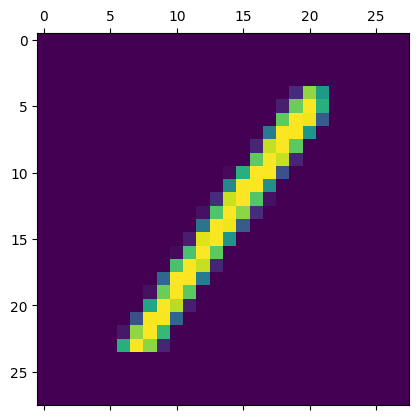

In [37]:
i = 1003

plt.matshow(xtrain[i])
ytrain[i]

In [38]:
xtrain.shape

(60000, 28, 28)

In [39]:
flat_xtrain = xtrain.reshape(len(xtrain), 784)
flat_xtest = xtest.reshape(len(xtest), 784)

flat_xtrain = np.array([e/255 for e in flat_xtrain])
flat_xtest = np.array([e/255 for e in flat_xtest]) #dont do this? probably

In [40]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(flat_xtrain, ytrain, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.4650 - accuracy: 0.8795
Epoch 2/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.3033 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 1s 760us/step - loss: 0.2829 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 1s 721us/step - loss: 0.2726 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.2666 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.2616 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.2581 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.2555 - accuracy: 0.9284
Epoch 9/10
1875/1875 [==============================] - 1s 751us/step - loss: 0.2525 - accuracy: 0.9295
Epoch 10/10
1875/1875 [==============================] - 1s 780u

In [41]:
model.evaluate(flat_xtest, ytest)

313/313 [==============================] - 0s 788us/step - loss: 0.2646 - accuracy: 0.9270


[0.26463383436203003, 0.9269999861717224]

In [42]:
i = 6438

#plt.matshow(xtest[i])
predicted_y = model.predict(flat_xtest)
results = dict(enumerate(predicted_y[i].flatten(), 0))
ans = max(results, key = results.get)
#print(ans,"with", (str)(results[ans]*100)+"% accuracy")

#OR:
np.argmax(predicted_y[i])

ytest[:5]

313/313 [==============================] - 0s 620us/step


array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
y_pred_labels = [np.argmax(i) for i in predicted_y]
y_pred_labels[:5]
cm = tf.math.confusion_matrix(labels = ytest, predictions = y_pred_labels)

In [44]:
def score(lst):
    sc = 0
    for i in range(len(lst)-1):
        for j in range(len(lst[0])-1):
            if i == j:
                sc += lst[i][j]
    
    return sc


score(cm.numpy().tolist())

8349

Text(33.22222222222222, 0.5, 'Truth')

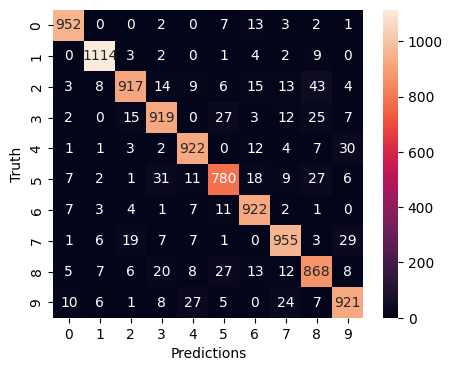

In [45]:
import seaborn as sn
plt.figure(figsize = (5, 4))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [46]:
#here we add 2 hidden layers
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(100, activation = 'sigmoid'),
    keras.layers.Dense(25, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(flat_xtrain, ytrain, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4777 - accuracy: 0.8941
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1387 - accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0907 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0669 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0516 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0409 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

313/313 [==============================] - 0s 974us/step
8785


Text(33.22222222222222, 0.5, 'Truth')

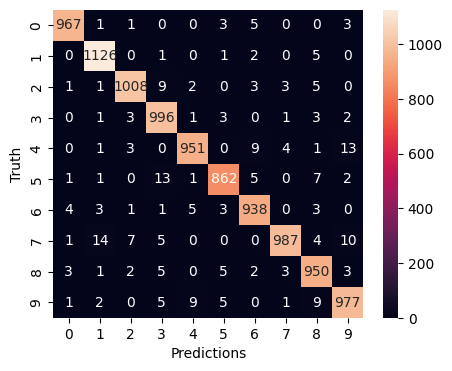

In [47]:
predicted_y = model.predict(flat_xtest)

np.argmax(predicted_y[i])
y_pred_labels = [np.argmax(i) for i in predicted_y]
y_pred_labels[:5]

cm = tf.math.confusion_matrix(labels = ytest, predictions = y_pred_labels)

print(score(cm.numpy().tolist()))

plt.figure(figsize = (5, 4))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predictions')
plt.ylabel('Truth')